# Kitti Road Data Cleanup

Kitti images need the following changes to work with Mobilenet:

- Image dimensions as multiples of 32. Default image size is 371x1227. Reduce to 352x1216 by using viewports function
- The background images should be trimmed to exclude non-masked areas. Alternatively, use 3 classes instead of 2.


In [95]:
import cv2
from CameraOperations import load_images_from_folder
from CameraOperations import show_grid
import glob
from ImageProcessing import get_viewport
from ImageProcessing import weighted_img
import numpy as np

   
def prepare_kitti_data(source="./data/data_road/fcn_training/", dest="./data/kitti_road/"):
    img_name_pattern = ["um_", "umm_", "uu_"]
    
    src_img,src_msk = source + "input/1", source + "output/1"
    dst_img, dst_msk = dest + "input/1", dest + "output/1"
    
    count = 0
    for n in range(len(img_name_pattern)):
        name_pattern = img_name_pattern[n]
        images = glob.glob("{0}/{1}*.*".format(src_img, name_pattern))
        for fname in images:
            count = count + 1
            mask = fname.replace("input", "output").replace(name_pattern, "{0}road_".format(name_pattern))
            img = cv2.imread(fname)
            msk = cv2.imread(mask)
            
            h, w, c = img.shape
            hd, wd  = h%32, w%32
            new_h, new_w = h-hd, w-wd
            
            x, y = hd // 2, wd // 2
            
            x1, y1 = x+new_w, y+new_h
            
            trimmed_img = img[y:y1, x:x1]
            trimmed_msk = msk[y:y1, x:x1]
            print((hd, wd), (x, y), (new_h, new_w), trimmed_img.shape)
            
            img_dest = "{0}/{1}.png".format(dst_img, count)
            msk_dest = "{0}/{1}.png".format(dst_msk, count)
            #print(count, "\t", img.shape, "\t", msk.shape)
            #print(fname, "\t", mask)
            #print(img_dest, "\t", msk_dest)
            
            cv2.imwrite(img_dest, trimmed_img)
            cv2.imwrite(msk_dest, trimmed_msk)
            #print(count, img.shape, trimmed_img.shape)


In [96]:
prepare_kitti_data()

(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(18, 10) (9, 5) (352, 1216) (352, 1216, 3)
(23, 26) (11

(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(18, 10) (9, 5) (352, 1216) (352, 1216, 3)
(18, 10) (9, 5) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(24, 25) (12, 12) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(22, 22) (11, 11) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(18, 10) (9, 5) (352, 1216) (352, 1216, 3)
(24, 25) (12, 12) (352, 1216) (352, 1216, 3)
(23, 26) (11, 13) (352, 1216) (352, 1216, 3)
(18, 10) (9, 5) (352, 1216) (352, 1216, 3)
(18, 10) (9, 5) (352, 1216) (352, 1216, 3)
(18, 10) (9, 5) (352, 1216) (352, 1216, 3)
(24, 25) (12, 12) (352, 1216) (352, 1216, 3)
(18, 10) (9, 5) (352, 1216) (352, 1216, 3)
(24, 25) (12, 12) (352, 1216) (352, 1216, 3)
(24, 25) (12, 12) (352, 1216) (352, 1216, 3)
(24, 25) (12, 12) (352, 1216) (352, 1216, 3)
(24, 25) (12, 12) (352, 1216) (352, 1216, 3)
(18, 10) (9, 5) (352, 12

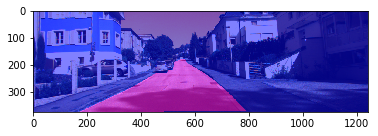

In [58]:
masked_img = weighted_img(img.astype('int16'), msk.astype('int16'), α=0.5, β=0.5, λ=0.0)
a = plt.imshow(masked_img)


In [97]:
def mask_kitti_data(src="./data/kitti_road/"):
    img_name_pattern = ["um_", "umm_", "uu_"]
    
    src_img = src + "input/1"
    count = 0 
    images = glob.glob("{0}input/1/*.*".format(src))
    for fname in images:
        count = count + 1
        mask = fname.replace("input", "output")
        img = cv2.imread(fname)
        msk = cv2.imread(mask)
        masked_img = weighted_img(img.astype('int16'), msk.astype('int16'), α=0.5, β=0.5, λ=0.0)
        img_dest = "./data/kitti_mask/{0}.png".format(count)
        cv2.imwrite(img_dest, masked_img)

mask_kitti_data()